<a href="https://colab.research.google.com/github/keshavmot/Case-Study-Notebooks/blob/main/CaseStudy_Walmart_KeshavMot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keshav Mot | Business Case: Walmart - CLT & CI

#Problem Statement
Walmart wants to analyze customer purchase behavior, specifically the purchase amount, against the customer's gender and additional factors. The primary question is whether there are disparities in spending habits between male and female customers during Black Friday. Using the Central limit theorem to compute the confidence interval where average population lies.

#Dataset Observation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

In [ ]:
walmart_df = pd.read_csv("walmart.csv")
df2 = walmart_df.copy(deep=True)

walmart_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


Above data set contain info of transaction made by customers in Walmart stores on black friday.

In [ ]:
#Shape of the Data frame
walmart_df.shape

(550068, 10)

Total entries in dataset is 5,50,068 rows and it contains 10 column.

In [ ]:
#Checking information column wise
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


We have 10 column in total:
* Half of the column have numerical value:
 * User_ID, Marital_Status, Purchase Amount
  * Occupation & Product_Category have Masked information.

* And rest 5 are object type:
 * Gender (Male or Female)
 * City_Category as A, B, C
 * Age Range, Range of Stay_In_Current_City_Years and Product_ID.

In [ ]:
#Describing the numerical columns of dataset.
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Description of numerical columns:
* Purchase Amount:
 * Data ranges from **12** to **23961**
 * Mean is **9264** & Median is **8047** with a high Standard deviation of **5023**.

In [ ]:
#Describing object type columns.
walmart_df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


Checking description of categorical
 columns:
* Maximum customer making a purchase are 'Males'
* Range of 26-35 are more frequent buyers
* There are 7 unique Age Range & 5 unique range of Duration of stay in current city.


---
# Pre-Processing

Need to convert Categorical values to object type.

In [ ]:
category1 = ['User_ID',	'Occupation',	'Marital_Status',	'Product_Category']
walmart_df[category1] = walmart_df[category1].astype('object')

In [ ]:
walmart_df.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


Checking description of other categorical columns:
* Total Unique buyers are 5891.
* Unmarried people more frequent buyers.
* There are 21 unique Occupation & 20 unique Product_Category.


In [ ]:
#Checking new information column wise
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


* We observed there is Zero null values in the dataset.
* Only 'Purchase' column is a numerical category

---
# Non-Graphical Analysis

NOTE: Question & analysis both are above the respective code

**Q: Which gender have more transactions on Black Friday?**
* Men have ~205% more transactions on Black Friday than women.

In [ ]:
walmart_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

**Q: What percent of people lived in the current city of 4+ years?**
* 15.40% people live in the current city for more than 4 years

In [ ]:
print(walmart_df['Stay_In_Current_City_Years'].value_counts())
walmart_df[walmart_df['Stay_In_Current_City_Years']=='4+']['Stay_In_Current_City_Years'].count() * 100 / walmart_df['Stay_In_Current_City_Years'].count()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


15.40282292371125

**Q. Which Age range have lowest purchases?**
* Age range have 7 unique ranges from which 0 - 17 years have least purchases.

In [ ]:
walmart_df['Age'].value_counts().sort_values()

0-17      15102
55+       21504
51-55     38501
46-50     45701
18-25     99660
36-45    110013
26-35    219587
Name: Age, dtype: int64

---
# Graphical Analysis

In [ ]:
df = walmart_df.copy(deep=True)

**Q: What is the purchase distribution according to Marital Status of consumers?**

* Married customers have less frequent purchases, that covers slighlty below half of the sales.

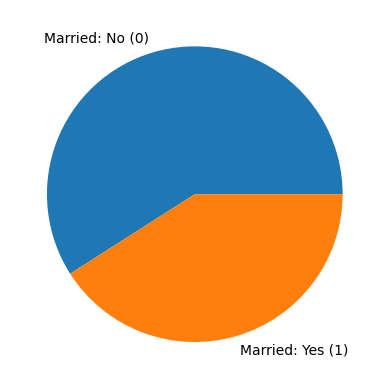

In [ ]:
plt.pie(df['Marital_Status'].value_counts(), labels = ["Married: No (0)","Married: Yes (1)"])
plt.show()

**Q: Which user/ user_id have maximum number of purchases?**

* User number '1001680' have maximum number of purchases i.e. over 1000 transactions.

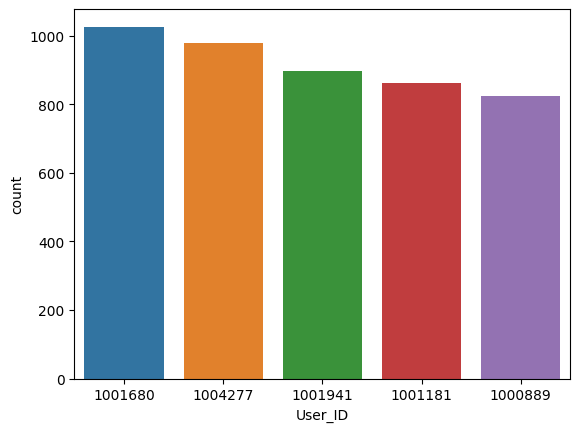

In [ ]:
sns.countplot(data = df, x= 'User_ID', order=df["User_ID"].value_counts().iloc[:5].index)
plt.show()

**Q.What is the likely range of amount spent by a customer?**
* A range of 5000 to 10000 is a sweet spot for most of the customers by looking at overall sample data.

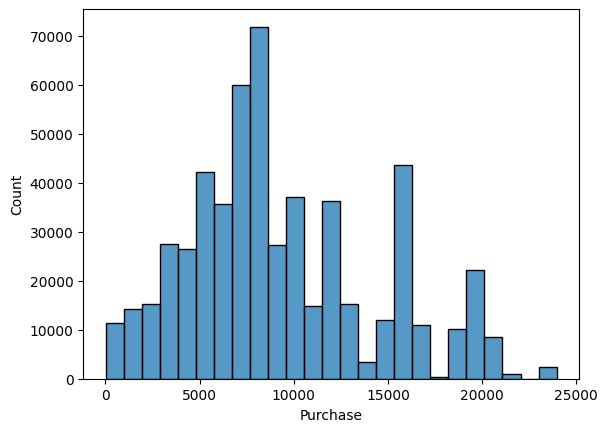

In [ ]:
sns.histplot(data=df, x='Purchase', bins=25)
plt.show()

**Q:Which Categories shows higher number of outliers than other (Find out using BoxPlot)?**

* Numerical category 'Purchases' have outliers
* There are significant number of outliers on the higher end of the purchase amout, an amount higher than ~22000 is condisered as a outlier in this case.

<Axes: ylabel='Purchase'>

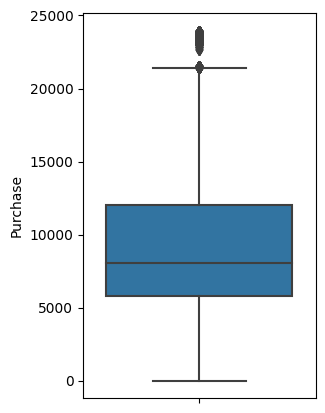

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(data=df, y='Purchase')

In [ ]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Purchase
Purchase,1.0


<ipython-input-21-b3e28bdcac35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True)


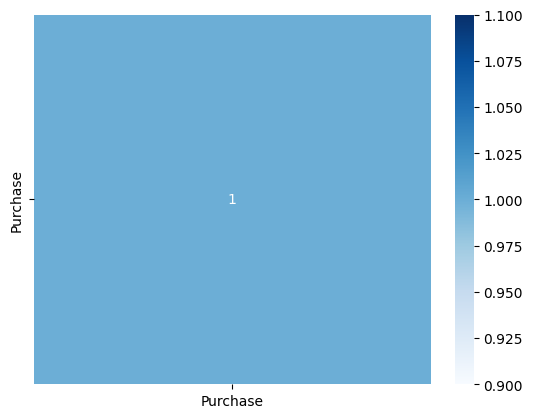

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

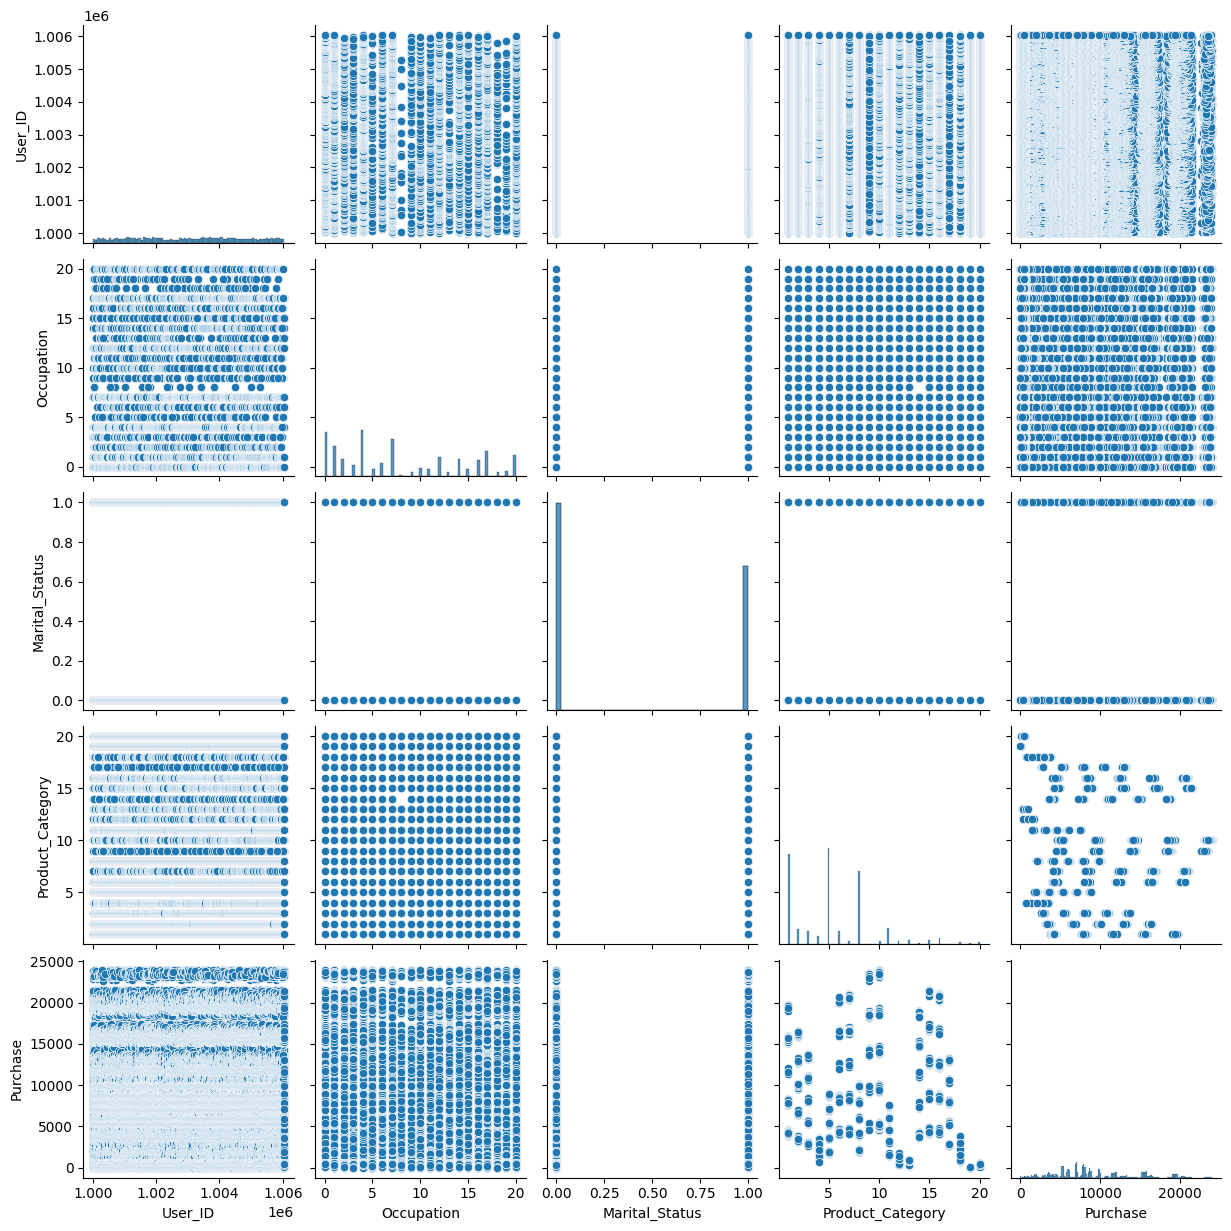

In [ ]:
sns.pairplot(data = df)
plt.show()

**Q: Which Categories shows most positive correlation among them?**


Obsereving from correlation table and pairplot:
* Data show NO significant correlation as their is only one true numerical value 'Purchase'. Two find out correlation we need at least 2 numerical columns.

* User_ID,	Occupation,	Marital_Status,	Product_Category may be stored in int64 format but they are categorical data.


---
# Exploration by CLT and CI

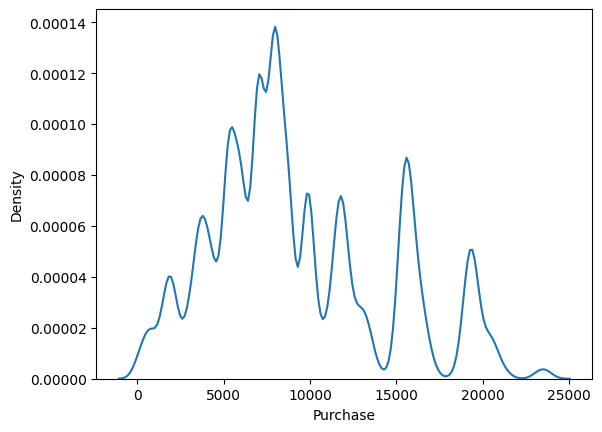

In [ ]:
# understanding distribution of amount spent on transaction in the dataset.

sns.kdeplot(df['Purchase'])
plt.show()

* The original data in dataset does not follow a normal curve in terms of spending amout by customers.
* In this case, we can use Sampling Distribution of Sampling mean (CLT) as it follows a normal curve.

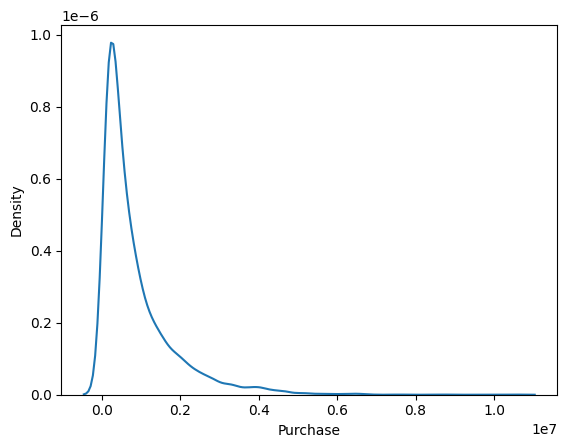

In [ ]:
#Distribution of amount spent on transaction by unique individual.
gender_df = df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
sns.kdeplot(gender_df['Purchase'])
plt.show()

* Above data show distribution of amount spent when individual Unique customers are grouped together.
* Graph appers to be Right Skewed.

**Q. Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
#Gender distribution as unique customers
gender_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [ ]:
#Avg spending Gender Wise
print("Male avg spending:", gender_df[gender_df['Gender']=="M"]['Purchase'].mean())
print("Female avg spending:", gender_df[gender_df['Gender']=="F"]['Purchase'].mean())

Male avg spending: 925344.4023668639
Female avg spending: 712024.3949579832


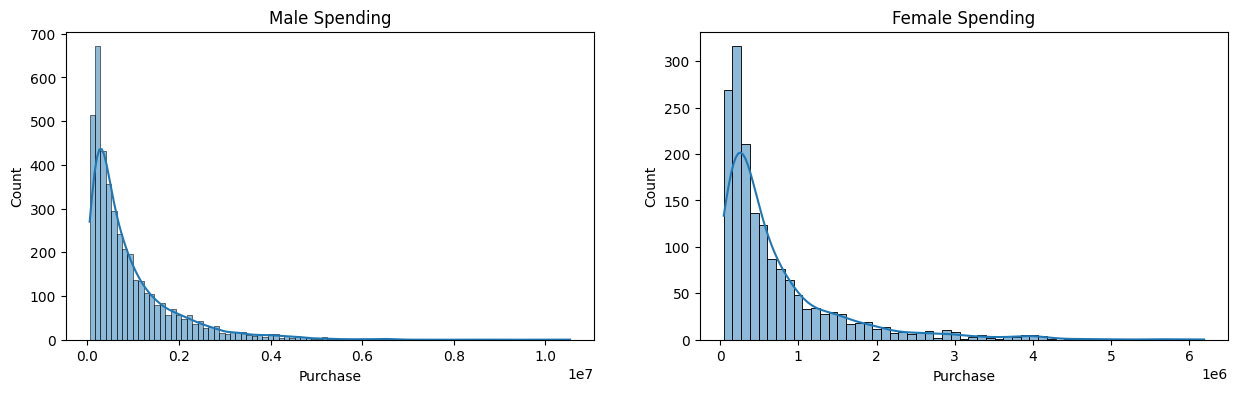

In [ ]:
#Visual distribution of speding of each gender.

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data=gender_df[gender_df['Gender']=="M"], x='Purchase', kde=True).set_title('Male Spending')

plt.subplot(1,2,2)
sns.histplot(data=gender_df[gender_df['Gender']=="F"], x='Purchase',kde=True).set_title('Female Spending')

plt.show()

* Male average spending: 925344.40
* Female average spending: 712024.39
* Above mean is taken as population mean.
* Above histplot shows significant difference pattern in spending as male spending graph have a longer tail compared to female spending, as males are making some high amount purchases.

**Q. Confidence intervals and distribution of the mean of the expenses by female and male customers?**

Confidence interval is taken of a normally distributed data, Hence, we will take Sampling Distribution of Sampling mean as it follows a normal curve.

In [ ]:
male_df = gender_df[gender_df['Gender']=="M"]
female_df = gender_df[gender_df['Gender']=="F"]

#number of sample mean
m_number = 1000
male_sampling = []
female_sampling = []

#Sampling Distribution of Sampling mean
for i in range(m_number):
  m1 = male_df['Purchase'].sample(n = 4000, replace = True).mean()
  male_sampling.append(m1)

  f1 = female_df['Purchase'].sample(n = 1500, replace = True).mean()
  female_sampling.append(f1)

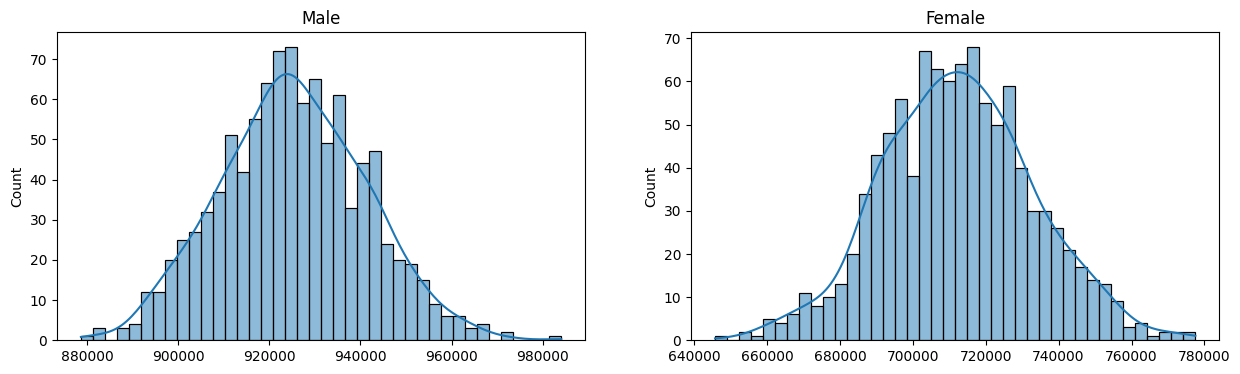

In [ ]:
#Visual of Sampling Distribution of each gender.

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data=male_sampling, kde=True, bins=40).set_title('Male')

plt.subplot(1,2,2)
sns.histplot(data=female_sampling,kde=True, bins=40).set_title('Female')

plt.show()

In [ ]:
#Sample Mean
mu_sample_m = np.mean(male_sampling)
mu_sample_f = np.mean(female_sampling)

print("Distribution mean male:",mu_sample_m)
print("Distribution mean female:",mu_sample_f)

Distribution mean male: 925293.1008942499
Distribution mean female: 712408.4302046666


* For Male:
 * Average spending of population is 925344
 * Above sampling mean is 925293 which is very close to poplulation value
* Female:
 * Average spending of population is 712024
 * Above sampling mean is 712408 which is very close to poplulation value

**Q. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
#sample vs population Std
sd_population_m = male_df['Purchase'].std()
sd_population_f = female_df['Purchase'].std()

sd_sample_m = np.std(male_sampling)
sd_sample_f = np.std(female_sampling)

print("sd_population_male:  ", sd_population_m)
print("sd_population_female:", sd_population_f, "\n")
print("sd_sample_male:  ", sd_sample_m)
print("sd_sample_female:", sd_sample_f)

sd_population_male:   985830.1007953875
sd_population_female: 807370.7261464577 

sd_sample_male:   15889.440414639077
sd_sample_female: 20807.79826045419


In [ ]:
#At 90% Confidence interval - Probability Point Function (0.05 to 0.95)
print( "90% CI male   => ", round(norm(mu_sample_m ,sd_sample_m).ppf(0.05), 2),",",round(norm(mu_sample_m ,sd_sample_m).ppf(0.95),2) )
print( "90% CI female => ", round(norm(mu_sample_f ,sd_sample_f).ppf(0.05), 2),",",round(norm(mu_sample_f ,sd_sample_f).ppf(0.95),2) , "\n")

#At 95% Confidence interval - Probability Point Function (0.025 to 0.975)
print( "95% CI male   => ", round(norm(mu_sample_m ,sd_sample_m).ppf(0.025), 2),",",round(norm(mu_sample_m ,sd_sample_m).ppf(0.975),2) )
print( "95% CI female => ", round(norm(mu_sample_f ,sd_sample_f).ppf(0.025), 2),",",round(norm(mu_sample_f ,sd_sample_f).ppf(0.975),2) , "\n")

#At 99% Confidence interval - Probability Point Function (0.005 to 0.995)
print( "99% CI male   => ", round(norm(mu_sample_m ,sd_sample_m).ppf(0.005), 2),",",round(norm(mu_sample_m ,sd_sample_m).ppf(0.995),2) )
print( "99% CI female => ", round(norm(mu_sample_f ,sd_sample_f).ppf(0.005), 2),",",round(norm(mu_sample_f ,sd_sample_f).ppf(0.995),2) )


90% CI male   =>  899157.3 , 951428.9
90% CI female =>  678182.65 , 746634.21 

95% CI male   =>  894150.37 , 956435.83
95% CI female =>  671625.9 , 753190.97 

99% CI male   =>  884364.61 , 966221.59
99% CI female =>  658811.09 , 766005.77


* Upper limit and Lower limit of males and females spending range are shown above.
* Even at 99% confidence interval the ranges do not overlap with each other, which shows their is a certain statical difference in spending pattern.

**Q. Results when the same activity is performed for Married vs Unmarried?**


Applying similar logic for married vs unmarried customers

In [ ]:
df_m = df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum().reset_index()

#Unique Count
print(df_m['Marital_Status'].value_counts(),'\n \n')

married_df = df_m[df_m['Marital_Status']==1]
unmarried_df = df_m[df_m['Marital_Status']==0]

#Avg spending
print("Population mean Married spending   :", married_df['Purchase'].mean())
print("Population mean Unmarried spending :", unmarried_df['Purchase'].mean(),'\n')

married_sampling = []
unmarried_sampling = []

#Sampling Distribution of Sampling mean
for i in range(m_number):
  m1 = married_df['Purchase'].sample(n = 2000, replace = True).mean()
  married_sampling.append(m1)
  um1 = unmarried_df['Purchase'].sample(n = 3000, replace = True).mean()
  unmarried_sampling.append(um1)

#Sample Mean
mu_sample_m = np.mean(married_sampling)
mu_sample_um = np.mean(unmarried_sampling)
print("Distribution mean Married spending   :",mu_sample_m)
print("Distribution mean Unmarried spending :",mu_sample_um, "\n", "\n")

#sample vs population Std
sd_population_m = married_df['Purchase'].std()
sd_population_um = unmarried_df['Purchase'].std()
sd_sample_m = np.std(married_sampling)
sd_sample_um = np.std(unmarried_sampling)

print("sd_population_male   :", sd_population_m)
print("sd_population_female :", sd_population_f, "\n")
print("sd_sample_male   :", sd_sample_m)
print("sd_sample_female :", sd_sample_f)

0    3417
1    2474
Name: Marital_Status, dtype: int64 
 

Population mean Married spending   : 843526.7966855295
Population mean Unmarried spending : 880575.7819724905 

Distribution mean Married spending   : 843413.0450440001
Distribution mean Unmarried spending : 881008.5614583333 
 

sd_population_male   : 935352.1158252305
sd_population_female : 807370.7261464577 

sd_sample_male   : 21429.512029327976
sd_sample_female : 20807.79826045419


* Looking at the above figues you can notice that the mean values are very close to the population.
* SD are calculated based on the number of samples taken ie. for married 2000 samples and for unmarried 3000 samples.

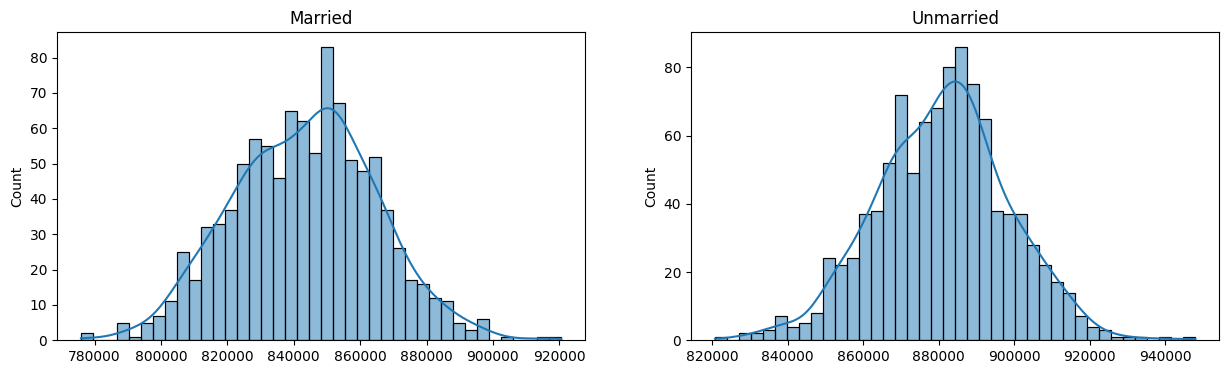

In [ ]:
#Visual of Sampling Distribution.

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data=married_sampling, kde=True, bins=40).set_title('Married')

plt.subplot(1,2,2)
sns.histplot(data=unmarried_sampling,kde=True, bins=40).set_title('Unmarried')

plt.show()

In [ ]:
#At 90% Confidence interval - Probability Point Function (0.05 to 0.95)
print( "90% CI married   => ", round(norm(mu_sample_m ,sd_sample_m).ppf(0.05), 2),",",round(norm(mu_sample_m ,sd_sample_m).ppf(0.95),2) )
print( "90% CI unmarried => ", round(norm(mu_sample_um ,sd_sample_um).ppf(0.05), 2),",",round(norm(mu_sample_um ,sd_sample_um).ppf(0.95),2) , "\n")

#At 95% Confidence interval - Probability Point Function (0.025 to 0.975)
print( "95% CI married   => ", round(norm(mu_sample_m ,sd_sample_m).ppf(0.025), 2),",",round(norm(mu_sample_m ,sd_sample_m).ppf(0.975),2) )
print( "95% CI unmarried => ", round(norm(mu_sample_um ,sd_sample_um).ppf(0.025), 2),",",round(norm(mu_sample_um ,sd_sample_um).ppf(0.975),2) , "\n")

#At 99% Confidence interval - Probability Point Function (0.005 to 0.995)
print( "99% CI married   => ", round(norm(mu_sample_m ,sd_sample_m).ppf(0.005), 2),",",round(norm(mu_sample_m ,sd_sample_m).ppf(0.995),2) )
print( "99% CI unmarried => ", round(norm(mu_sample_um ,sd_sample_um).ppf(0.005), 2),",",round(norm(mu_sample_um ,sd_sample_um).ppf(0.995),2) )

90% CI married   =>  808164.63 , 878661.46
90% CI unmarried =>  852185.45 , 909831.68 

95% CI married   =>  801411.97 , 885414.12
95% CI unmarried =>  846663.7 , 915353.42 

99% CI married   =>  788214.28 , 898611.81
99% CI unmarried =>  835871.76 , 926145.36


* Upper limit and Lower limit of married and unmarried spending range are shown above.
* Even at 90% confidence interval the ranges do overlap with each other, which shows their is a certain statical similar in spending pattern.

**Q. Results when the same activity is performed for Age?**

In [ ]:
age_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum().reset_index()

#Unique Count
age_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
age_ranges = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
age_means = {}

for age in age_ranges:
  age_means[age] = []

m_number=1000   #No of sample means
n = 200         #each sample size

for age in age_ranges:
  #Sampling Distribution of Sampling mean
  for i in range(m_number):
    m1 = age_df[age_df['Age']==age]['Purchase'].sample(n = n, replace = True).mean()
    age_means[age].append(m1)

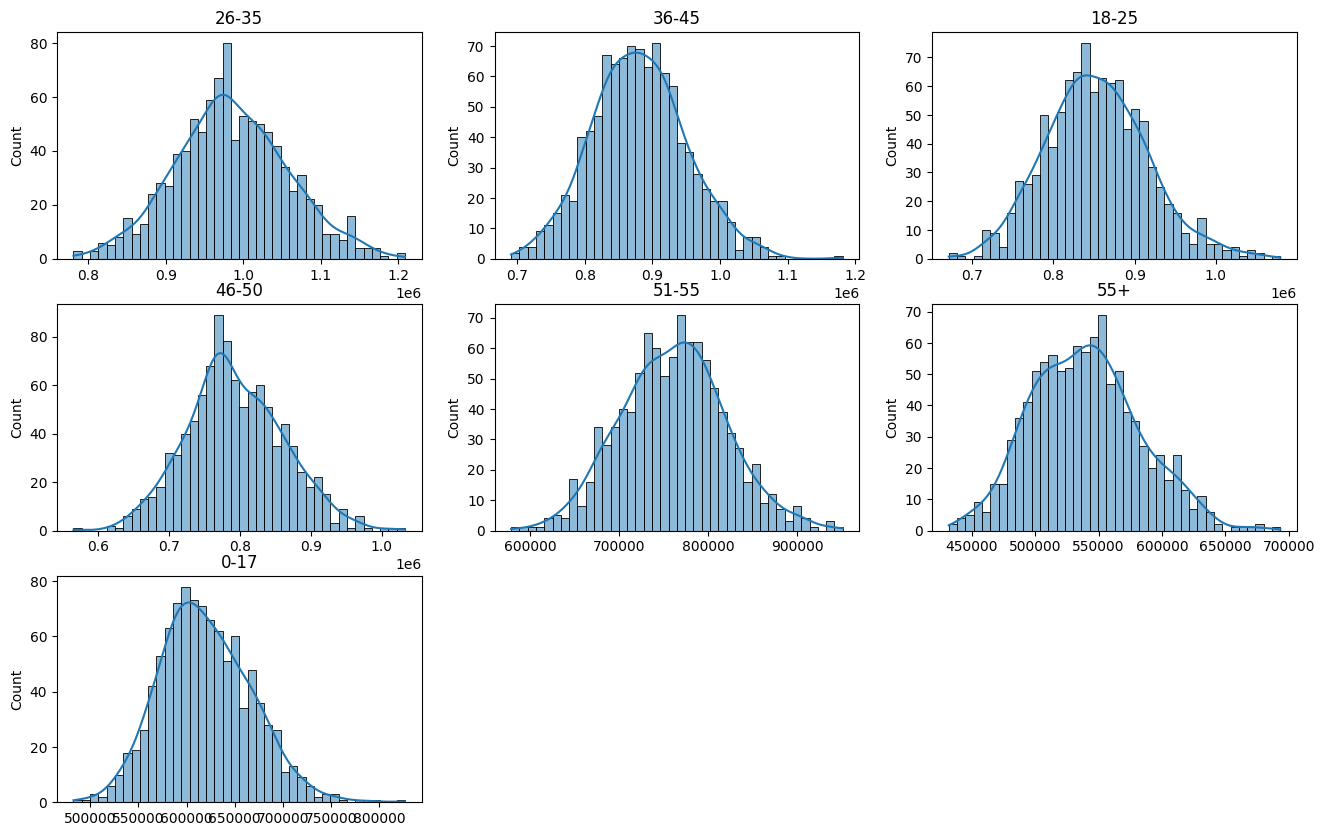

In [ ]:
#Visual of Sampling Distribution.

plt.figure(figsize=(16,10))

i=1
for age in age_ranges:

  plt.subplot(3,3,i)
  sns.histplot(data=age_means[age], kde=True, bins=40).set_title(age)
  i=i+1

plt.show()

In [ ]:
#At 95% Confidence interval - Probability Point Function (0.025 to 0.975)

for age in age_ranges:

  #sample vs population mean
  print("Population mean for age {} =>".format(age), age_df[age_df['Age']==age]['Purchase'].mean())

  sample_m = np.mean(age_means[age])
  print("Sample     mean for age {} =>".format(age), sample_m)

  #sample vs population Std
  sd_population_m = age_df[age_df['Age']==age]['Purchase'].std()
  sd_sample_m = np.std(age_means[age])

  print("Population  SD  for age {} =>".format(age), sd_population_m)
  print("Sample      SD  for age {} =>".format(age), sd_sample_m)

  print( "At  95%  Confidence  Interval => (", round(norm(sample_m ,sd_sample_m).ppf(0.025), 2),",",round(norm(sample_m ,sd_sample_m).ppf(0.975),2),')' )
  print("\n----\n")



Population mean for age 26-35 => 989659.3170969313
Sample     mean for age 26-35 => 985198.77257
Population  SD  for age 26-35 => 1031610.1238008772
Sample      SD  for age 26-35 => 72357.06253930466
At  95%  Confidence  Interval => ( 843381.54 , 1127016.01 )

----

Population mean for age 36-45 => 879665.7103684661
Sample     mean for age 36-45 => 880500.596435
Population  SD  for age 36-45 => 981580.3877317656
Sample      SD  for age 36-45 => 69642.53386982488
At  95%  Confidence  Interval => ( 744003.74 , 1016997.45 )

----

Population mean for age 18-25 => 854863.119738073
Sample     mean for age 18-25 => 853192.7999749999
Population  SD  for age 18-25 => 887957.2520758108
Sample      SD  for age 18-25 => 62716.0024667538
At  95%  Confidence  Interval => ( 730271.69 , 976113.91 )

----

Population mean for age 46-50 => 792548.7815442561
Sample     mean for age 46-50 => 792895.1403450001
Population  SD  for age 46-50 => 929298.8774145002
Sample      SD  for age 46-50 => 67645.675101

* Confidence Interval of different ranges are shown above
* data is arranged in Decending number of customer in each age range.
* 40% transaction are made by age range 26-35

---
# Insights & Recommendations

*NOTE: Insights are provided in detail near each individual plot/question.*

**Recommendations:**
* As per the data males tend to spend more amount than females, using this analysis walmart can target high-priced premium products towards the male audience.
* Unmarried consumers are more frequent in terms of shopping, hence company can feature more products that attract an unmarried consumer base.
* A consumer who is typically new to a city have a higher number of transaction than people living in the same city for years, creating a featured product zone that targets items for new movers will increase revenue.
* There are a lot of returning customers for Walmart, as many consumers have more than 900 transactions in Walmart, the company can run a loyalty program for customers and give rewards on the number of times transactions are done.